In [5]:
from hydra.experimental import compose, initialize
import hydra
from copy import copy
from omegaconf import OmegaConf
from box import Box, BoxList
import os
from datetime import datetime
from itertools import product
from pprint import pprint

logs = BoxList([])
seed = 78

import random
import numpy as np
np.random.seed(seed)
random.seed(seed)
from pyleaves.utils import ensure_dir_exists

# overrides = ['dataset@dataset=PNAS_family_100', 'model@model=resnet_50_v2', 'model.params.optimizer="SGD"', 'model.params.weights="imagenet"', 'model.params.lr=1e-5', 'model.params.regularization.l2=1e-3', 'callbacks.early_stopping.patience=3', 'tags=["PNAS_family_100","debug","env=pyleaves2.2"]', 'dataset.params.training.target_size=[512,512]', 'dataset.params.training.batch_size=16', 'model.params.head_layers=[512,256]', 'dataset.params.training.num_epochs=30', 'orchestration.debug=True']#,  '--multirun']

def main(config_path='baseline_configs', config_name='pretrain_then_finetune_config', overrides: list=[]):

    with initialize(config_path=config_path):
        config = compose(config_name=config_name, overrides=overrides)

    return config

In [24]:
pprint(dict(config.pretrain))#.image_dir

{'METRICS': ['f1', 'accuracy'],
 'augmentations': {'flip': 0.0, 'rotate': 0.0, 'sbc': 0.0},
 'batch_size': 32,
 'color_mode': 'rgb',
 'dataset': {'dataset_name': 'Leaves_family_100', 'image_dir': '/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/data_splits/Leaves_family_100_2020-03', 'validation_split': 0.1, 'test_size': 0.3, 'threshold': 100},
 'early_stopping': {'monitor': 'val_loss', 'patience': 10, 'min_delta': 0.01, 'restore_best_weights': True},
 'frozen_layers': None,
 'head_layers': [256, 128],
 'image_subdir': 'test_size-0.3',
 'input_shape': None,
 'loss': 'categorical_crossentropy',
 'lr': 3e-05,
 'lr_momentum': None,
 'model_name': 'resnet_50_v2',
 'num_classes': None,
 'num_epochs': 30,
 'num_parallel_calls': -1,
 'optimizer': 'Adam',
 'preprocess_input': 'tensorflow.keras.applications.resnet_v2.preprocess_input',
 'regularization': {'l2': None, 'l1': None},
 'saved_model_path': '/media/data_cifs_lrs/projects/prj_fossils/users/jacob/models/Leaves_family_100-F

In [27]:
os.path.exists(config.pretrain.train_image_dir)
os.path.exists(config.pretrain.test_image_dir)

True

In [23]:
config = main(overrides=['dataset_0@dataset_0=Leaves_family_100'])
config.task=0
print(config.pretty(resolve=True))

task: 0
dataset:
  '0':
    dataset_name: Leaves_family_100
    image_dir: /media/data_cifs_lrs/projects/prj_fossils/data/processed_data/data_splits/Leaves_family_100_2020-03
    validation_split: 0.1
    test_size: 0.3
    threshold: 100
  '1':
    dataset_name: Fossil_family_4
    image_dir: /media/data_cifs_lrs/projects/prj_fossils/data/processed_data/data_splits/Fossil_family_4_2020-06
    validation_split: 0.1
    test_size: 0.3
    threshold: 4
dataset_name:
  '0': Leaves_family_100
  '1': Fossil_family_4
experiment_name: Leaves_family_100-Fossil_family_4_[299, 299]-resnet_50_v2
pretrain:
  stage:
    task: pretrain+validate
    subsets:
    - train
    - val
    dataset_name: Leaves_family_100
    test_size: 0.3
    params:
      fit_class_weights: false
    class_encodings: null
  dataset:
    dataset_name: Leaves_family_100
    image_dir: /media/data_cifs_lrs/projects/prj_fossils/data/processed_data/data_splits/Leaves_family_100_2020-03
    validation_split: 0.1
    test_size:

In [2]:
# initialize(config_path="configs")
# config_name="simplified_config"
# # config_0 = compose(config_name=config_name, overrides=overrides)

# overrides=['dataset@dataset=PNAS_family_100']
# config = compose(config_name=config_name, overrides=overrides)

# test_config = main(overrides=['dataset@dataset=Fossil_family_100_test',
#                               '~dataset.params.training.target_size',
#                              'dataset.params.training.augmentations=[]'])
# # merged_config = OmegaConf.merge(config, test_config)
# # copied = OmegaConf.masked_copy(test_config, ["dataset"])
# # pprint(OmegaConf.to_container(copied))
# # pprint(OmegaConf.to_container(test_config))

# def resolve_test_config(main_config, test_data_config):

#     copied_test_cfg = OmegaConf.masked_copy(test_data_config, ["dataset"])
#     resolved_main_cfg = OmegaConf.to_container(main_config, resolve=True)
#     resolved_main_cfg = OmegaConf.create(resolved_main_cfg)
#     merged_config = OmegaConf.merge(resolved_main_cfg, copied_test_cfg)
    
#     return merged_config

# config.dataset.params.training

# config.task = 0
# config.dataset.params.training.target_size = [768,768]
# merged_config = resolve_test_config(main_config=config, test_data_config=test_config)

# # merged_config.task = 0
# pprint(OmegaConf.to_container(merged_config, resolve=True))

# type(config)

# Programmatically transferring images into class-specific hierarchical directories

### Transforming a 2-level hierarchy into single level in preparation for using an ImageDataGenerator from tf.keras



We have a dataset of images from 3 different collections (i.e. original publishing source) with overlapping subsets of class labels in the form of biological family (e.g. Theaceae, Rosaceae).

## source structure:
```
./wolfe/
        Acanthaceae/
            image_0.jpg
            image_1.jpg
            ...
        Achariaceae/
        ...
        Winteraceae/
        Zygophyllaceae/
./axelrod/
        Acanthaceae/
            ...
        ...
./klucking/
        ...
```


## target structure:

```
Acanthaceae/
    image_0.jpg
    image_1.jpg
    ...
Achariaceae/
...
Winteraceae/
Zygophyllaceae/



```



In [1]:
# import os
# import shutil
# # PNAS_dir = '/media/data_cifs/jacob/Fossil_Project/data/scratch_data/PNAS 2016 leaves'#/PNAS_family'
# # from tqdm.auto import tqdm
# from tqdm.notebook import tqdm
# from pathlib import Path

# PNAS_dir = '/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/PNAS_2020-06'
# output_root_dir = '/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/PNAS_2020-06/PNAS_family'
# collections = ['wolfe','axelrod','klucking']
# collection_dirs = [os.path.join(PNAS_dir, collection) for collection in collections]
# collection_dirs

# def get_collection_files(collection_dir, position=0, leave=False):
#     collection_files = {}
#     for family in tqdm(os.listdir(collection_dir), desc=f'collection {Path(collection_dir).name}', position=position, leave=leave):
#         family_dir = os.path.join(collection_dir, family)
#         fam_files = [os.path.join(family_dir, file) for file in os.listdir(family_dir)]
#         if family not in collection_files.keys():
#             collection_files[family] = []
#         collection_files[family].extend(fam_files)
        
#     return collection_files
    
# def gather_collections(collection_dirs, leave=False):
#     all_files = {}
#     for collection_dir in tqdm(collection_dirs, desc=f'PNAS collections', position=0, leave=leave):
#         collection_files = get_collection_files(collection_dir, position=1, leave=leave)
#         for family, fam_files in collection_files.items():
#             if family not in all_files.keys():
#                 all_files[family] = []
#             all_files[family].extend(fam_files)
#     return all_files


# # if False:
# all_files = gather_collections(collection_dirs, leave=True)
# print(len(all_files))
# #     leave=True
# #     for family, family_files in  tqdm(all_files.items(), desc='Family directories', position=0, leave=leave):
# #         family_dir = os.path.join(output_root_dir, family)
# #         os.makedirs(family_dir)
# #         for file in tqdm(family_files, desc = f'{family} files', position=1, leave=False):
# #             shutil.copy(file, family_dir)


# import pandas as pd
# from sklearn.model_selection import train_test_split

# collected = []
# for family_label, filepaths in tqdm(all_files.items()):
#     collected.extend([{'family':family_label, 'path':file} for file in filepaths])
# collected = pd.DataFrame.from_records(collected)

# # collected.describe(include='all')
# # collected.apply(lambda x: x.family in x.path, axis=1).sum()

# threshold = 4
# filtered = collected.groupby('family').filter(lambda x: len(x) >= threshold)
# # filtered.groupby('family').apply(lambda x: len(x) >= threshold).shape

# train_data, test_data = train_test_split(filtered, train_size=0.5, random_state=2, shuffle=True, stratify=filtered.family)
# train_data.family.value_counts().min()
# test_data.family.value_counts().min()

# import logging

# def setup_logger(output_dir: str, output_name: str):
#     logging.basicConfig(filename=os.path.join(output_dir,output_name+'.log'), format='%(asctime)s - %(message)s', level=logging.INFO)
    
    
# def generate_family_directories(file_df: pd.DataFrame, class_label: str='family', output_root_dir: str ='/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/PNAS_2020-06/PNAS_family'):
    
#     total = 0
#     for class_i, class_i_files in  tqdm(file_df.groupby(class_label), desc=f'{class_label} directories', position=0, leave=True):
#         class_i_dir = os.path.join(output_root_dir, class_i)
#         os.makedirs(class_i_dir)
#         i=0
#         for file in tqdm(class_i_files.path, desc = f'{class_i} files', position=1, leave=False):
#             shutil.copy(file, class_i_dir)
#             i+=1
#         total+=i
#         logging.info(f'created {i} new files in {class_i_dir} for class {class_i}. Total is now {total}')
#     return total


# output_root_dir ='/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/PNAS_2020-06/PNAS_family_4'
# train_dir = os.path.join(output_root_dir, 'train')
# test_dir = os.path.join(output_root_dir, 'test')
# os.makedirs(train_dir)
# os.makedirs(test_dir)


# setup_logger(output_dir=output_root_dir, output_name='PNAS_family_4')

# train_total = generate_family_directories(file_df=train_data, class_label='family', output_root_dir=train_dir)
# print(f'TRAIN CREATED WITH TOTAL {train_total} files')
# test_total = generate_family_directories(file_df=test_data, class_label='family', output_root_dir=test_dir)
# print(f'TEST CREATED WITH TOTAL {test_total} files')


################################################################################################################################################
################################################################################################################################################
# NEW SECTION
################################################################################################################################################
################################################################################################################################################



## Proposed procedure for experiment logging:
(last edited 9/26/2020)
1. Debug code until a baseline end-to-end example is working.

2. Upload notebook checkpoint to neptune

3. Perform series of variations/experiments by slightly altering the notebook or its inputs, upload metrics to neptune either all under the same experiment name, or a different one for each

4. Once an optimal set of parameters/hyperparameters is reached or new conclusions made, restore the notebook back to the state that resulted in the optimal run.

5. Create final checkpoint for notebook with name and detailed summary of conclusions


### Extra things to try later:

1. After 5., export the notebook and a conda environment file or docker image to permanent location, ideally along with a writeup or even paper notes or blogpost.


In [2]:
path = "/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/test_labels_w_predictions_PNAS_family_4_resnet50_v2_768.csv"

import pandas as pd


results = pd.read_csv(path)
y, y_pred = results['y'], results['y_pred']

In [12]:
results.y.value_counts()
results.y_pred.value_counts()


incorrect = results[results.y!=results.y_pred]
correct = results[results.y==results.y_pred]

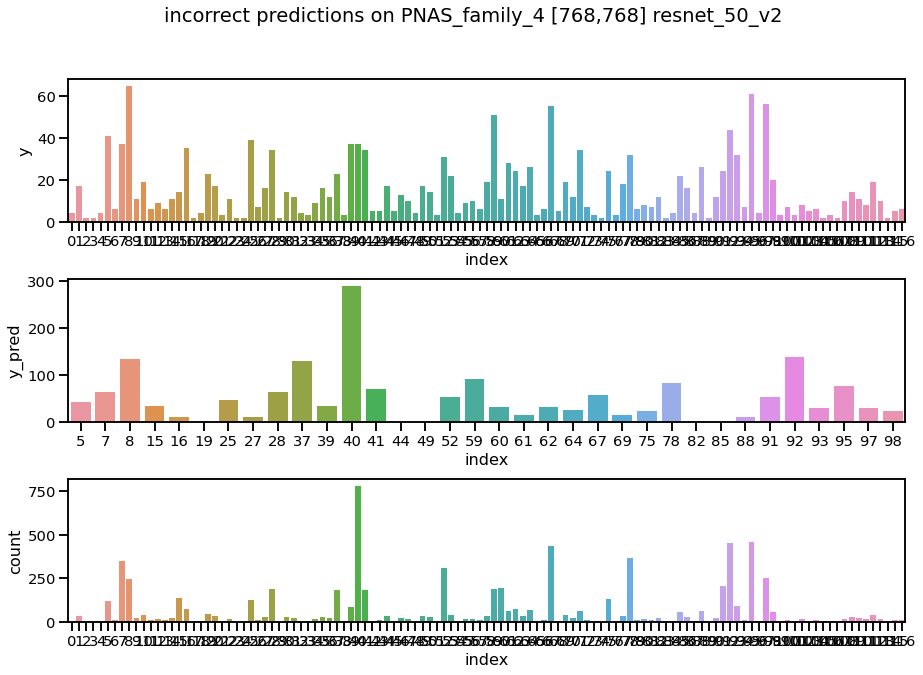

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3,1,figsize=(15,10))
plt.sca(ax[0])
ax[0] = sns.barplot(x='index',y='y',data=incorrect.y.value_counts().reset_index(), ax=ax[0])


ax[1] = sns.barplot(x='index',y='y_pred',data=incorrect.y_pred.value_counts().reset_index(), ax=ax[1])






# from paleoai_data.utils.dataset_utils import create_dataset_by_name
# pnas = create_dataset_by_name(name='PNAS', version='v0.2')
# metadata = pnas.metadata.metadata_view_at_threshold(4)
data = metadata.class_distribution


data = pd.DataFrame({'count':list(data.values())}).reset_index()
ax[2] = sns.barplot(x='index', y='count',data=data, ax=ax[2])

plt.subplots_adjust(hspace=0.4)


plt.suptitle("incorrect predictions on PNAS_family_4 [768,768] resnet_50_v2")

plt.savefig("incorrect predictions on PNAS_family_4 [768,768] resnet_50_v2.jpg")

In [45]:
metadata

MetaData(name=PNAS)
  7494 samples
  117 classes
  threshold = 4
class_type: family
max_class:
  count: 776
  name: Fabaceae
mean_class_count: 64
min_class:
  count: 4
  name: Actinidiaceae
std_class_count: 115
  

In [31]:
# import tensorflow as tf
# from sklearn.metrics import classification_report
# import os
# import numpy as np
# # model_path = "/media/data/jacob/simplified-baselines/Leaves_in_PNAS_family_100_resnet_50_v2_[512, 512]/task-9_2020-09-22_23-25-32/model_dir/saved_model"
# # model = tf.keras.models.load_model(model_path)
# model_config.num_classes = encoder.num_classes
# model = build_model(model_config)

# # from hydra.experimental import compose, initialize
# from omegaconf import OmegaConf, DictConfig

# # with initialize(config_path="configs"):
# #     config = compose(config_name="config", overrides=['dataset@dataset=PNAS','use_tfrecords=False'])
# #     print(config.pretty())
# import hydra
# # from pyleaves.pipelines.pipeline_1 import *

# from pyleaves.datasets import base_dataset

# from pyleaves.utils.experiment_utils import resolve_config_interpolations
# from paleoai_data.utils.kfold_cross_validation import DataFold
# from typing import List, Union
# import random
# import numpy as np
# from more_itertools import unzip
# import shutil
# import os
# import neptune
# from pathlib import Path
# import yaml



In [1]:
from typing import Union

import pandas as pd
from boltons.dictutils import OneToOne
from pyleaves.utils import set_tf_config
gpu = set_tf_config(gpu_num=None, num_gpus=1, wait=0)

import tensorflow as tf
from tensorflow.keras import backend as K
K.clear_session()

from pyleaves.utils.pipeline_utils import build_model
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from pprint import pprint
from box import Box
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

import neptune
# import neptune_tensorboard as neptune_tb

from neptunecontrib.monitoring.keras import NeptuneMonitor


setGPU: Setting GPU to: [2]
Initial visible GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
visible GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Successfully set memory_growth=True and limited GPUs visible to tensorflow.

Now using GPU(s):
['/physical_device:GPU:0']


In [15]:
labels_w_preds = pd.read_csv('/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/test_labels_w_predictions_PNAS_family_4_resnet50_v2_768.csv')

In [16]:
labels_w_preds

,Unnamed: 0,y,y_pred
0,0,0,88
1,1,0,25
2,2,0,88
3,3,0,52
4,4,1,7
...,...,...,...
3742,3742,116,40
3743,3743,116,67
3744,3744,116,40
3745,3745,116,37


In [2]:
def load_data_from_tensor_slices(data: pd.DataFrame, cache_paths: Union[bool,str]=True, training=False, seed=None, x_col='path', y_col='label', dtype=tf.uint8):

    num_samples = data.shape[0]

    def load_img(image_path):
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        return img

    x_data = tf.data.Dataset.from_tensor_slices(data[x_col].values.tolist())
    y_data = tf.data.Dataset.from_tensor_slices(data[y_col].values.tolist())
    data = tf.data.Dataset.zip((x_data, y_data))
    
    # TODO TEST performance and randomness of the order of shuffle and cache when shuffling full dataset each iteration, but only filepaths and not full images.
    if training:
        data = data.shuffle(num_samples,seed=seed, reshuffle_each_iteration=True)
    if cache_paths:
        if isinstance(cache_paths, str):
            data = data.cache(cache_paths)
        else:
            data = data.cache()

    data = data.map(lambda x,y: (tf.image.convert_image_dtype(load_img(x)*255.0,dtype=dtype),y), num_parallel_calls=-1)
    return data

def img_data_gen_2_tf_data(data, training=False, target_size=(256,256), batch_size=16, seed=None, preprocess_input=None, num_parallel_calls=-1):

    num_samples = data.samples
    num_classes = data.num_classes
    class_encoder = OneToOne(data.class_indices)
    paths = data.filepaths
    labels = data.labels

    prepped_data = pd.DataFrame.from_records([{'path':path, 'label':label} for path, label in zip(paths, labels)])
    tf_data = load_data_from_tensor_slices(data=prepped_data, training=training, seed=seed, x_col='path', y_col='label', dtype=tf.float32)
    
    if preprocess_input is not None:
        tf_data = tf_data.map(lambda x,y: (preprocess_input(x), y), num_parallel_calls=num_parallel_calls)
    
    tf_data = tf_data.map(lambda x,y: (tf.image.resize(x, size=target_size), tf.one_hot(y, depth=num_classes)), num_parallel_calls=num_parallel_calls)
    
    tf_data = tf_data.repeat().batch(batch_size).prefetch(1)
    return {'data':tf_data, 'encoder':class_encoder, 'num_samples':num_samples, 'num_classes':num_classes}
# print(class_encoder.inv)
# print(test_data.samples)
# print(test_data.num_classes)
# print(test_data.labels)
# # print(test_data.filepaths)
# print(test_data.class_indices)

      
# def image_resize(x, size=(256,256), resize_func = tf.image.resize):
#     return [
#         (tf.image.resize(x, size=size, method='bilinear'),'bilinear'),
#         (tf.image.resize(x, size=size, method='bicubic'), 'bicubic'),
#         (tf.image.resize(x, size=size, method='gaussian'), 'gaussian'),
#         (tf.image.resize(x, size=size, method='nearest'), 'nearest'),
#         (tf.image.resize(x, size=size, method='area'), 'area'),
#         (tf.image.resize(x, size=size, method='lanczos3'),'lanczos3'),
#         (tf.image.resize(x, size=size, method='lanczos5'),'lanczos5'),
#         (tf.image.resize(x, size=size, method='mitchellcubic'),'mitchellcubic'),
#     ]
def image_resize(x, resize_func = tf.image.resize, **kwargs):
    return [
        (resize_func(x, method='bilinear', **kwargs),'bilinear'),
        (resize_func(x, method='bicubic', **kwargs), 'bicubic'),
        (resize_func(x, method='gaussian', **kwargs), 'gaussian'),
        (resize_func(x, method='nearest', **kwargs), 'nearest'),
        (resize_func(x, method='area', **kwargs), 'area'),
        (resize_func(x, method='lanczos3', **kwargs),'lanczos3'),
        (resize_func(x, method='lanczos5', **kwargs),'lanczos5'),
        (resize_func(x, method='mitchellcubic', **kwargs),'mitchellcubic'),
    ]
    

def show_batch(image_w_label_batch, num_images=5, title=''):
    fig = plt.figure(figsize=(num_images*7,num_images*3/2))
    plt.suptitle(title)
    for n in range(num_images):
        ax = plt.subplot(2, num_images//2, n+1)
        img, label = image_w_label_batch[n]
        img_max = np.max(img.numpy())
        img_min = np.min(img.numpy())
        scaled_img = (img.numpy()-img_min)/(img_max-img_min)
        plt.imshow(scaled_img)
        title = f'{label}|min={img_min:.2f}|max={img_max:.2f}|dtype={img.dtype}'
           
        plt.title(title)
        plt.axis('off')
    return fig
    
    
    
def test_interpolation_methods(image,resize_func=tf.image.resize, **kwargs):
    x = image_resize(image, resize_func=resize_func, **kwargs)
    title = f'{resize_func.__name__}|original->min={np.min(image.numpy()):.2f}|max={np.max(image.numpy()):.2f}|dtype={image.dtype}'
    fig = show_batch(x, num_images=len(x), title=title)
    return fig

# image = next(iter(test_tf_data_info['data']))
# fig_0 = test_interpolation_methods(image[0], size=(256,256), resize_func=tf.image.resize)#, preserve_aspect_ratio=True)

# size = (256,256)
# fig_1 = test_interpolation_methods(image[0], target_height = size[0], target_width = size[1], resize_func=tf.image.resize_with_pad)

# resize_func=tf.image.resize_with_crop_or_pad
# plt.imshow(resize_func(image[0], target_height = size[0], target_width = size[1]))
# plt.suptitle(resize_func.__name__)

# plt.imshow(image[0].numpy())

import matplotlib.pyplot as plt

#hide
# Image plotting utils
def show_batch(image_batch, label_batch, title='', class_names=None):
    fig = plt.figure(figsize=(15, 15))

    label_batch = [class_names[l] for l in np.argmax(label_batch, axis=1)]
    
    img_max = np.max(image_batch)
    img_min = np.min(image_batch)
    scaled_image_batch = (image_batch-img_min)/(img_max-img_min)

    title = f'{title}|min={img_min:.2f}|max={img_max:.2f}|dtype={image_batch.dtype}\n(Scaled to [0,1] for visualization)'
    plt.suptitle(title)
    for n in range(25):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(scaled_image_batch[n])
        plt.title(label_batch[n])
        
        plt.axis('off')
    return fig



def summarize_sample(x, y):
    y_int=y
    y_encoding = 'sparse int'
    if isinstance(y, np.ndarray):
        y_int = np.argmax(y, axis=-1)
        if y.ndim>=1 and y.shape[-1] > 1:
            y_encoding = 'one hot'
    print(f'y = {y_int} [{y_encoding} encoded]')
    print(f'y.dtype = {y.dtype}, x.dtype = {x.dtype}\n')
    print(f'y.shape = {y.shape},\ny.min() = {y.min():.3f} | y.max() = {y.max():.3f},\ny.mean() = {y.mean():.3f} | y.std() = {y.std():.3f}\n')
    print(f'x.shape = {x.shape},\nx.min() = {x.min():.3f} | x.max() = {x.max():.3f},\nx.mean() = {x.mean():.3f} | x.std() = {x.std():.3f}')

    plt.imshow(x)

# from pyleaves.pipelines.pipeline_simple import *
# from hydra.core.hydra_config import HydraConfig

neptune_project_name = 'jacobarose/jupyter-testing-ground'
neptune_experiment_name = 'baseline-PNAS_family'


params = Box({
              'train_image_dir': '/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/PNAS_2020-06/PNAS_family_4/train',
              'test_image_dir': '/media/data_cifs_lrs/projects/prj_fossils/data/processed_data/PNAS_2020-06/PNAS_family_4/test',
              'log_dir': '/media/data_cifs_lrs/projects/prj_fossils/users/jacob/tensorboard_log_dir',          
              'validation_split': 0.1,
              'target_size':(768,768),#(299,299),
              'batch_size':32,
              'num_epochs': 30,
              'seed': 20,
              'rescale': None, #1.0/255,
              'preprocess_input':"tensorflow.keras.applications.resnet_v2.preprocess_input",
              'color_mode': 'rgb',
              'early_stopping': {'monitor':"val_loss",
                                'patience':10,
                                'min_delta':0.01,
                                'restore_best_weights':True}
    
})

if params.preprocess_input == "tensorflow.keras.applications.resnet_v2.preprocess_input":
    from tensorflow.keras.applications.resnet_v2 import preprocess_input
    print("Using preprocessing function: tensorflow.keras.applications.resnet_v2.preprocess_input")
else:
    preprocess_input = None
    print("Using no preprocess_input function")

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=params.rescale,
                                                          preprocessing_function=preprocess_input,
                                                          validation_split=params.validation_split)


train_iter = datagen.flow_from_directory(
    params.train_image_dir, target_size=params.target_size, color_mode=params.color_mode, classes=None,
    class_mode='categorical', batch_size=params.batch_size, shuffle=True, seed=params.seed,
    subset='training', interpolation='nearest')


val_iter = datagen.flow_from_directory(
    params.train_image_dir, target_size=params.target_size, color_mode=params.color_mode, classes=None,
    class_mode='categorical', batch_size=params.batch_size, shuffle=False, seed=params.seed,
    subset='validation', interpolation='nearest')


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = params.rescale,
                                                               preprocessing_function = preprocess_input)

test_iter = test_datagen.flow_from_directory(
    params.test_image_dir, target_size=params.target_size, color_mode=params.color_mode, classes=None,
    class_mode='categorical', batch_size=params.batch_size, shuffle=False, seed=params.seed, interpolation='nearest')


train_data_info = img_data_gen_2_tf_data(train_iter, training=True, target_size=params.target_size, batch_size=params.batch_size, seed=params.seed, preprocess_input=preprocess_input)
val_data_info = img_data_gen_2_tf_data(val_iter, training=False, target_size=params.target_size, batch_size=params.batch_size, seed=params.seed, preprocess_input=preprocess_input)
test_data_info = img_data_gen_2_tf_data(test_iter, training=False, target_size=params.target_size, batch_size=params.batch_size, seed=params.seed, preprocess_input=preprocess_input)

train_data = train_data_info['data']
val_data = val_data_info['data']
test_data = test_data_info['data']

# def img_data_gen_2_tf_data(data, training=False, preprocess_func=max): #target_size=(256,256), batch_size=16, seed=None, prepocess_func=None):#, num_parallel_calls=-1):

#     num_samples = data.samples
#     num_classes = data.num_classes
#     class_encoder = OneToOne(data.class_indices)
#     paths = data.filepaths
#     labels = data.labels

#     prepped_data = pd.DataFrame.from_records([{'path':path, 'label':label} for path, label in zip(paths, labels)])
#     tf_data = load_data_from_tensor_slices(data=prepped_data, training=training, seed=seed, x_col='path', y_col='label')
    
#     if preprocess_func is not None:
#         tf_data = tf_data.map(lambda x,y: (preprocess_func(x), y), num_parallel_calls=num_parallel_calls)
    
#     tf_data = tf_data.map(lambda x,y: (tf.image.resize(x, size=target_size), tf.one_hot(y, depth=num_classes)), num_parallel_calls=num_parallel_calls)
    
#     tf_data = tf_data.repeat().batch(batch_size).prefetch(1)
#     return {'data':tf_data, 'encoder':class_encoder, 'num_samples':num_samples, 'num_classes':num_classes}

# show_batch(a[0].numpy().astype(np.uint8), a[1].numpy(), image_data_gen=True, class_names=test_data_info['encoder'].inv)

# batch_min = np.min(a[0].numpy())
# batch_max = np.max(a[0].numpy())
# title = f'min={batch_min:.2f}|max={batch_max:.2f}|dtype={a[0].dtype}'
# plt.title(title)

/media/data/conda/jacob/envs/pyleaves2.2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using preprocessing function: tensorflow.keras.applications.resnet_v2.preprocess_input
Found 3426 images belonging to 117 classes.
Found 321 images belonging to 117 classes.
Found 3747 images belonging to 117 classes.


/media/data/conda/jacob/envs/pyleaves2.2/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


In [11]:
from typing import List, Dict

train_iter.labels

class_encoder = OneToOne(train_iter.class_indices).inv
def decode_int2str(labels: List[int], class_encoder: Dict[int, str]) -> List[str]:
    return [class_encoder[label] for label in labels]


def encode_str2int(labels: List[str], class_encoder: Dict[str, int]) -> List[int]:
    return [class_encoder[label] for label in labels]



text_labels = decode_int2str(labels=train_iter.labels, class_encoder=class_encoder)

int_labels = encode_str2int(labels=text_labels, class_encoder=class_encoder.inv)

In [12]:
int_labels

/media/data/conda/jacob/envs/pyleaves2.2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,


In [3]:
params.num_samples_train = train_iter.samples
params.num_samples_val = val_iter.samples
params.num_classes = train_iter.num_classes
steps_per_epoch=params.num_samples_train//params.batch_size
validation_steps=params.num_samples_val//params.batch_size
model_config = Box({
                    'model_name': "resnet_50_v2",
                    'optimizer':"Adam",
                    'num_classes':params.num_classes,
                    'weights': "imagenet",
                    'frozen_layers':'bn', #(0,-4),
                    'input_shape':(*params.target_size,3),
                    'lr':1e-5,
                    'lr_momentum':None,#0.9,
                    'regularization':{},#{"l2": 1e-4},
                    'loss':'categorical_crossentropy',
                    'METRICS':['f1','accuracy'],
                    'head_layers': [256,128]
                    })


neptune_params = {}
for k,v in {**params.to_dict(), **model_config.to_dict()}.items():
    if type(v)==dict:
        neptune_params[k] = str(v)
    else:
        neptune_params[k] = v
        
model = build_model(model_config)

# image_batch.shape
# label_batch.shape
# train_data.class_indices.items()

# for layer_i in model_config.frozen_layers:
# #     print(f'{model.layers[0].layers[layer_i].name}.trainable={model.layers[0].layers[layer_i].trainable}')
# for layer_i in model.layers[0].layers:
#     print(f'{layer_i.name}.trainable={layer_i.trainable}')

# train_data_info['encoder']

In [7]:
# neptune.init(project_qualified_name=neptune_project_name)
# with neptune.create_experiment(name='temp_pred_visualization') as experiment:
#     y, y_pred = labels_w_preds.y.values, labels_w_preds.y_pred.values
#     log_prediction_distribution(y, y_pred, experiment=experiment)
    
    
# y, y_pred = labels_w_preds.y.values, labels_w_preds.y_pred.values
from vis.visualization import visualize_saliency
from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np


model_path = '/media/data_cifs_lrs/projects/prj_fossils/users/jacob/models/Fossil_family_4-[768, 768]'

# model = tf.keras.models.load_model(model_path)


imgs, labels = next(iter(train_data))

vis_saliency_maps(model, imgs.numpy(), labels.numpy(), classes=train_data_info['encoder'].inv, dataset_name='PNAS')

ImportError: cannot import name '_Conv' from 'keras.layers.convolutional' (/media/data/conda/jacob/envs/pyleaves2.2/lib/python3.7/site-packages/keras/layers/convolutional.py)

/media/data/conda/jacob/envs/pyleaves2.2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://ui.neptune.ai/jacobarose/jupyter-testing-ground/e/JUP-46
[BEGINNING TRAINING]
Epoch 1/30


/media/data/conda/jacob/envs/pyleaves2.2/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


107/107 [==============================] - 100s 934ms/step - loss: 4.3492 - weighted_f1: 0.0751 - accuracy: 0.1116 - top-3_accuracy: 0.1869 - top-5_accuracy: 0.2287 - val_loss: 3.5955 - val_weighted_f1: 0.1547 - val_accuracy: 0.2562 - val_top-3_accuracy: 0.4094 - val_top-5_accuracy: 0.4625
Epoch 2/30
107/107 [==============================] - 89s 835ms/step - loss: 3.3848 - weighted_f1: 0.2280 - accuracy: 0.3157 - top-3_accuracy: 0.4594 - top-5_accuracy: 0.5134 - val_loss: 2.9307 - val_weighted_f1: 0.3280 - val_accuracy: 0.4094 - val_top-3_accuracy: 0.5406 - val_top-5_accuracy: 0.5969
Epoch 3/30
107/107 [==============================] - 94s 877ms/step - loss: 2.6981 - weighted_f1: 0.3705 - accuracy: 0.4565 - top-3_accuracy: 0.5943 - top-5_accuracy: 0.6411 - val_loss: 2.5990 - val_weighted_f1: 0.3884 - val_accuracy: 0.4500 - val_top-3_accuracy: 0.5813 - val_top-5_accuracy: 0.6656
Epoch 4/30
107/107 [==============================] - 89s 835ms/step - loss: 2.1806 - weighted_f1: 0.4736 -

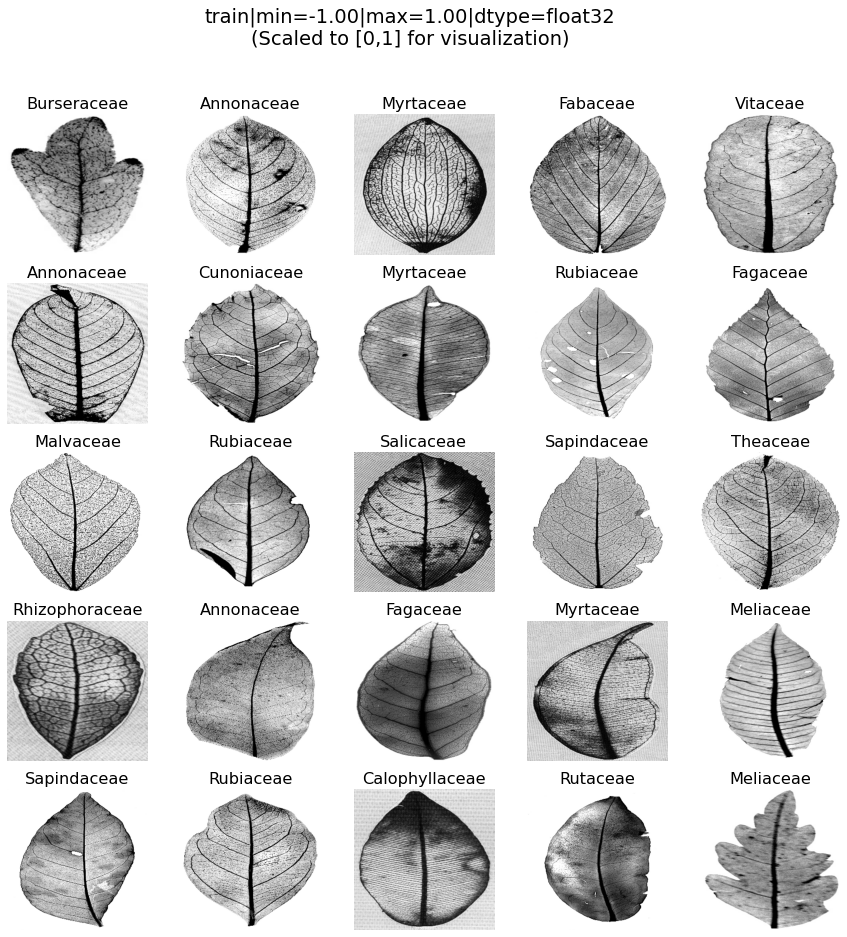

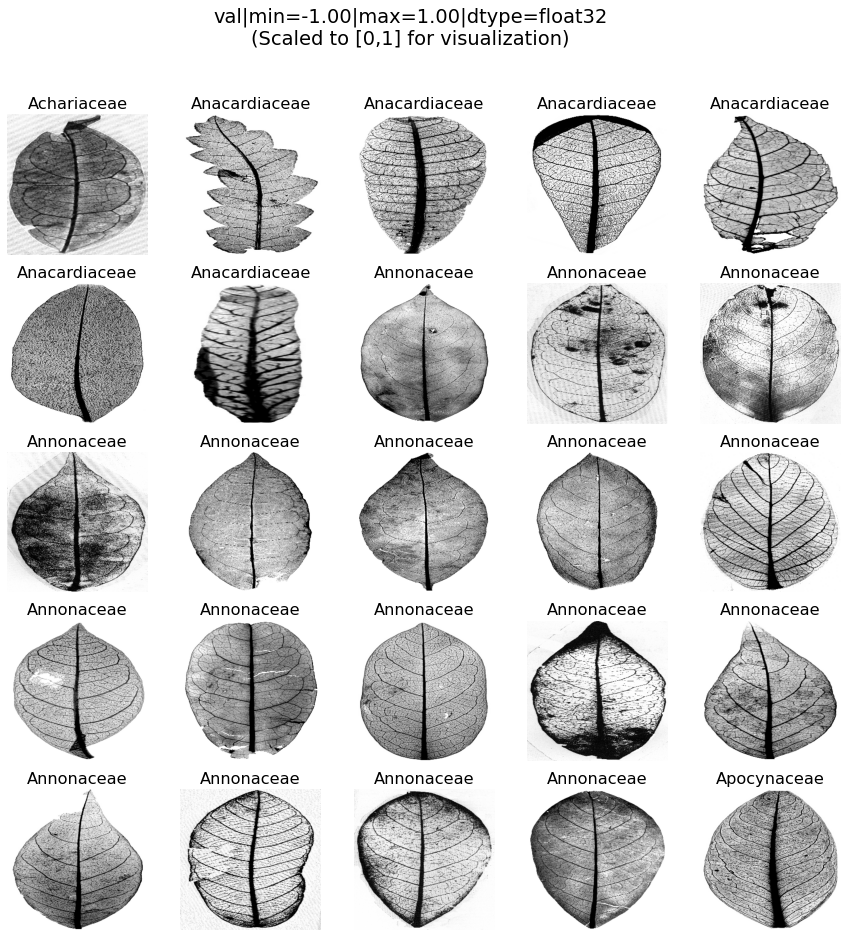

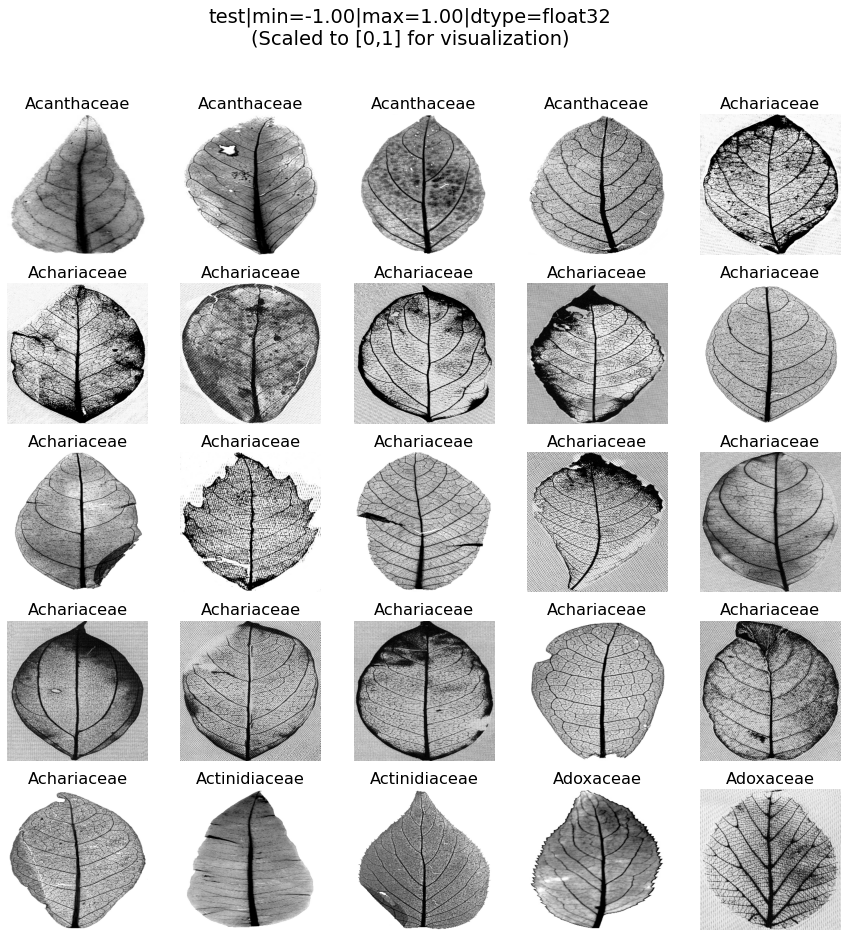

In [12]:
neptune.init(project_qualified_name=neptune_project_name)

from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
callbacks = [TensorBoard(log_dir=params.log_dir, profile_batch=2),
             NeptuneMonitor(),
             EarlyStopping(monitor=params.early_stopping.monitor,
                           patience=params.early_stopping.patience,
                           min_delta=params.early_stopping.min_delta, 
                           verbose=1, 
                           restore_best_weights=params.early_stopping.restore_best_weights)]


with neptune.create_experiment(name=neptune_experiment_name, params=neptune_params) as experiment:
    
#     image_batch, label_batch = next(iter(train_data))
#     classes = {v: k for k, v in train_iter.class_indices.items()}
#     fig = show_batch(image_batch.numpy(), label_batch.numpy(), image_data_gen=True, class_names=classes)
#     neptune.log_image('train_image', fig)
    
#     image_batch, label_batch = next(iter(val_data))
#     fig = show_batch(image_batch.numpy(), label_batch.numpy(), image_data_gen=True, class_names=classes)
#     neptune.log_image('val_image', fig)



    class_names = train_data_info['encoder'].inv

    image_batch, label_batch = next(iter(train_data))
    fig = show_batch(image_batch.numpy(), label_batch.numpy(), title='train', class_names=class_names)
    experiment.log_image('train_image_batch', fig)

    image_batch, label_batch = next(iter(val_data))
    fig = show_batch(image_batch.numpy(), label_batch.numpy(), title='val', class_names=class_names)
    experiment.log_image('val_image_batch', fig)


    image_batch, label_batch = next(iter(test_data))
    fig = show_batch(image_batch.numpy(), label_batch.numpy(), title='test', class_names=class_names)
    experiment.log_image('test_image_batch', fig)
    
    model.summary(print_fn=lambda x: neptune.log_text('model_summary', x))

    
    
    
    print('[BEGINNING TRAINING]')
    try:
        history = model.fit(train_data,
                            epochs=params.num_epochs,
                            callbacks=callbacks,
                            validation_data=val_data,
                            validation_freq=1,
                            shuffle=True,
                            steps_per_epoch=steps_per_epoch,
                            validation_steps=validation_steps,
                            verbose=1)

    except Exception as e:
        raise e

## 9:22 AM Running a trial to measure (0,-4)=frozen_layers

JUP-10

In [ ]:
#     if os.path.exists(csv_path):
#         neptune.log_artifact(csv_path)

#     model.save(config.run_dirs.saved_model_path)
#     print('[STAGE COMPLETED]')
#     print(f'Saved trained model to {config.run_dirs.saved_model_path}')

#     print('history.history.keys() =',history.history.keys())

#     steps = split_datasets['test'].num_samples//data_config.training.batch_size

#     test_results = evaluate(model, encoder, model_config, data_config, test_data=test_data, steps=steps, num_classes=encoder.num_classes, confusion_matrix=True)

#     print('TEST RESULTS:')
#     pprint(test_results)

#     # for k,v in test_results.items():
#     #     neptune.log_metric(k, v)
#     # predictions = model.predict(test_data, steps=split_datasets['test'].num_samples)

# print(['[FINISHED TRAINING AND TESTING]'])

# return test_results